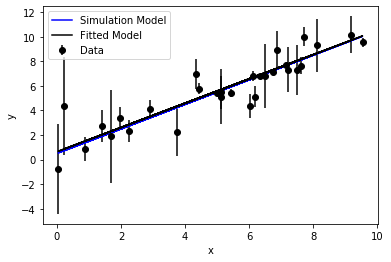

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements
npts = 30
np.random.seed(10)
x = np.random.uniform(0.0, 10.0, npts)
y = line_orig(x)
yunc = np.absolute(np.random.normal(0.5, 2.5, npts))
y += np.random.normal(0.0, yunc, npts)

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line = fit(line_init, x, y, weights=1.0/yunc)

# plot
plt.figure()
plt.errorbar(x, y, yerr=yunc, fmt='ko', label='Data')
plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [26]:
fit.fit_info

{'residuals': array([35.17396818]),
 'rank': 2,
 'singular_values': array([0.029625  , 0.00037749]),
 'params': array([0.98872862, 0.63775451])}

In [27]:
chi2 = ((y - fitted_line(x)) / yunc)**2
chi2.sum()

35.17396817780942

$$ Cov = [A^T C^{-1} A]^{-1}$$

In [28]:
A = np.array([ np.ones_like(x),  x,])
A

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [7.71320643, 0.20751949, 6.33648235, 7.48803883, 4.98507012,
        2.24796646, 1.98062865, 7.60530712, 1.69110837, 0.88339814,
        6.85359818, 9.53393346, 0.03948266, 5.12192263, 8.12620962,
        6.12526067, 7.21755317, 2.91876068, 9.17774123, 7.14575783,
        5.42544368, 1.42170048, 3.7334076 , 6.74133615, 4.41833174,
        4.34013993, 6.17766978, 5.13138243, 6.50397182, 6.01038953]])

In [29]:
np.linalg.inv(np.dot(np.dot(A, np.linalg.inv(np.diagflat(yunc))), A.T))

array([[ 0.18649006, -0.02760471],
       [-0.02760471,  0.00438608]])

In [30]:
covmat = np.linalg.inv(np.dot(np.dot(A, np.linalg.inv(np.diagflat(yunc))), A.T))

In [31]:
b_unc = covmat[0,0]**0.5
m_unc = covmat[1,1]**0.5
m,b=fit.fit_info['params']

In [32]:
print(f"y={m}+/-{m_unc} x + {b} +/- {b_unc}")

y=0.9887286202586674+/-0.06622751098813856 x + 0.637754514785926 +/- 0.43184494523754424


# Gaussian and inverse Gaussian...

In [46]:
# 10000 random samples  for Q = 1/x
Q = np.random.randn(10000)*5 + 100
# x ~ 1/q

In [47]:
import pylab as pl

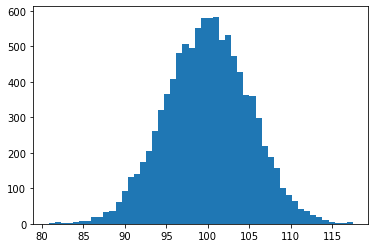

In [48]:
_=pl.hist(Q, bins=50)

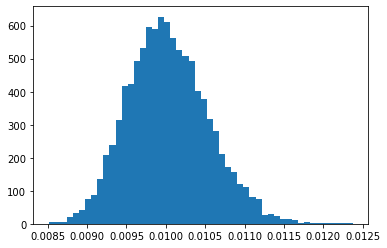

In [49]:
_=pl.hist(1/Q, bins=50)

In [50]:
Q.mean() * np.std(1/Q), np.std(Q)/Q.mean()

(0.05135057196716816, 0.05071682975538716)

$ Q = 1/x $

$\sigma_{Q} / Q = Q \sigma_{1/Q} = Q \sigma_{x} = 1/x \sigma x$

$\sigma_Q / Q = \sigma_x / x$

In [60]:
x = 1/Q
sigma_q = np.std(Q)
sigma_x = sigma_q / Q * x 

In [61]:
sigma_x.mean()

0.0005113345415491361

In [62]:
np.std(x)

0.0005136973354662269